In [1]:
from neuralogic.nn import get_evaluator
from neuralogic.core import R, Template, V, Settings, Transformation, Combination
from neuralogic.core.constructs.function.function import F
from neuralogic.core.settings import Settings
from neuralogic.dataset import Dataset
from neuralogic.optim import SGD

train_dataset = Dataset()
template = Template()

train_dataset.add_example([R.b[3], R.c[5]])

# just write to template list of operations to perform
#template += (R.a <= (R.b, R.c)) | [Combination.SUM, Transformation.IDENTITY]
# template += rule with metadata
# a = b + c

template += (R.a <= (x:=R.b, y:= R.c)) >> F.identity(x + y)

# now useless
train_dataset.add_queries([R.a[3]])

# [R.relA(V.X) <= (R.relB(V.Y), R.relC(V.Y, V.X))] | [Transformation.SIGMOID]
# (R.message2(V.X)[5,10] <= (R.message1(V.Y)[10,20], R.edge(V.Y, V.X))) | [Transformation.RELU, Aggregation.AVG]
# (R.m2(V.X) <= [x:=R.m1(V.X), y:=R.edge(V.Y, V.X)]) >> F.sigmoid(x + y)

settings = Settings(optimizer=SGD(), epochs=1)
print("debug hello?")
# calling evaluator with template with rules that have no metadata
neuralogic_evaluator = get_evaluator(template, settings)

build_dataset = neuralogic_evaluator.build_dataset(train_dataset)

for _ in neuralogic_evaluator.train(train_dataset):
    pass

C:\Users\kraus\Plocha\VS\BAK\PyNeuraLogicFork\neuralogic\core\builder\builder.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


1: __le__ called
2: __add__ called
identity{(b.+c.)}
debug hello?


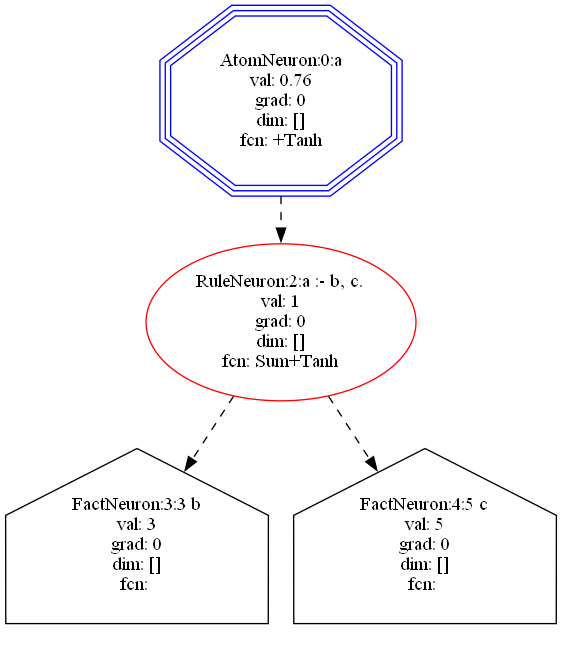

In [2]:
build_dataset[0].draw()